## Final Project Submission

Please fill out:
* Student name: Moses Lin
* Student pace: full time
* Scheduled project review date/time: 7/31/2020
* Instructor name: Sean Abu Wilson
* Blog post URL:

# Source:

Data was downloaded from Kaggle, and contains a dataset of Steam Games gathered from the Steam Store and SteamSpy API around May 2019.

https://www.kaggle.com/nikdavis/steam-store-games

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('seaborn')
sns.set(style="white")
import itertools
import re
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
from math import exp
from sklearn import metrics
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

In [4]:
df = pd.read_csv('steam.csv')
df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19


# Cleaning Data

In [5]:
df.isna().sum()
#Checking how many missing numbers there are
#Makes sense, since this dataset said it was "clean"

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [6]:
print(511/(26564+511))
df['english'].value_counts()
#about 1.9% of all games in this set are not in English, will drop non-english games.

0.01887349953831948


1    26564
0      511
Name: english, dtype: int64

In [7]:
df['required_age'].value_counts()
#seems most games do not have a rating listed, will drop this column

0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64

In [8]:
df.drop(columns=['appid', 'steamspy_tags', 'english', 'required_age', 'owners'], inplace=True)
df.head()
#Dropping columns that don't seem particularly useful.

,name,release_date,developer,publisher,platforms,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
0,Counter-Strike,2000-11-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,317,7.19
1,Team Fortress Classic,1999-04-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,62,3.99
2,Day of Defeat,2003-05-01,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,34,3.99
3,Deathmatch Classic,2001-06-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,184,3.99
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,415,3.99


In [9]:
df['price'].sort_values(ascending=False).head(30)
df['price'] = df.price[df['price'] < 70.00]
# There are quite a few "games" with prices that are absurdly beyond what is considered normal.

In [17]:
from datetime import datetime
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d %H:%M:%S")
    d2 = datetime.strptime(d2, "%Y-%m-%d %H:%M:%S")
    return abs((d2 - d1).days)

df['release_date'] = df['release_date'].astype('datetime64[ns]')
df['release_year'] = df['release_date'].apply(lambda x: x.year)

df['days_from_launch'] = df['release_date'].apply(lambda row: days_between(f'{row}', '2019-05-28 0:0:0'))
df = df.drop(columns='release_date')

# Release date itself is hard to work with so I will convert it to year and generate a new feature at the same time.

# Target Variable

Because number of positive reviews out of negative reviews is a little vague, and not really representative of scoring if there are very few reviews. I will be using the formula from https://steamdb.info/blog/steamdb-rating/.

- totalreview = positiverating + negativerating

- reviewscore = positiverating / totalreview

- rating = reviewscore - (reviewscore - 0.5) * (2**(-log10(totalreview + 1)))

It is important to remember not to use any of these as features, as they will mess up the data by being directly related to the target variable.

In [10]:
df['totalreview'] = df['positive_ratings'] + df['negative_ratings']
df['reviewscore'] = df['positive_ratings'] / df['totalreview']
df['rating'] = df['reviewscore'] - (df['reviewscore'] - 0.5) * (2 ** (-np.log10(df['totalreview'] + 1)))
df.head()

,name,release_date,developer,publisher,platforms,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,totalreview,reviewscore,rating
0,Counter-Strike,2000-11-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,124534,3339,17612,317,7.19,127873,0.973888,0.960136
1,Team Fortress Classic,1999-04-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,3318,633,277,62,3.99,3951,0.839787,0.811703
2,Day of Defeat,2003-05-01,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,0,3416,398,187,34,3.99,3814,0.895648,0.862598
3,Deathmatch Classic,2001-06-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,0,1273,267,258,184,3.99,1540,0.826623,0.790779
4,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,0,5250,288,624,415,3.99,5538,0.947996,0.914546


Might as well take a look at the how the rating distribution is like for the top 10 and worst 10 games in this dataset.

In [11]:
top10 = df.nlargest(10, ['rating'])
worst10 = df.nsmallest(10, ['rating'])

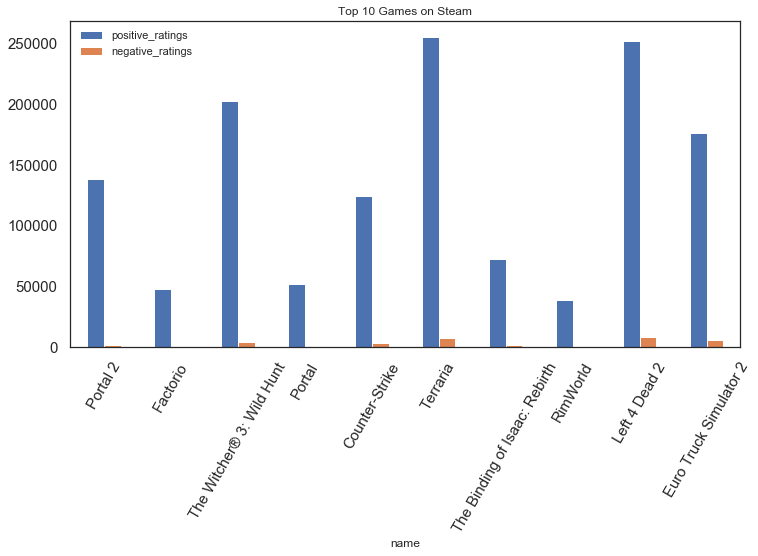

In [15]:
top10.plot(x='name', y=['positive_ratings', 'negative_ratings'], kind='bar', figsize=(12,6),title='Top 10 Games on Steam', fontsize=15, rot=60)

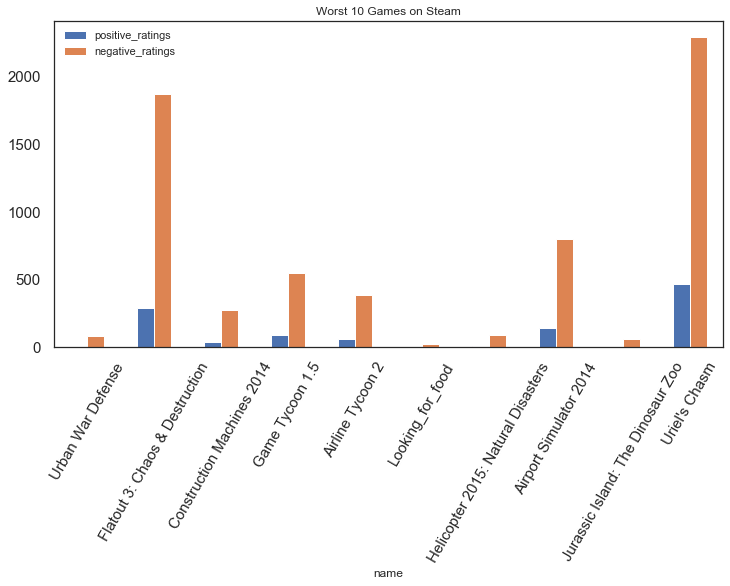

In [14]:
worst10.plot(x='name', y=['positive_ratings', 'negative_ratings'], kind='bar', figsize=(12,6),title='Worst 10 Games on Steam', fontsize=15, rot=60)

It makes sense how this works, as the positive and negative ratings are directly correlated with each other in determining the rating. If a game has a lot of ratings in general, it will have a sizeable chunk be either bad ratings or good ratings for top and worst games respectively in order to have similar ratios.

# Exploratory Data Analysis

In [19]:
df2005up = df[df['release_year'].between(2005, 2018)]
df2005up
#I chose 2005 to 2018, as there are not many games before 2005 released on steam, and because the data was collected in 2019, there will be very few games for 2019 as well

,name,developer,publisher,platforms,categories,genres,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,totalreview,reviewscore,rating,release_year,days_from_launch
12,Day of Defeat: Source,Valve,Valve,windows;mac;linux,Multi-player;Cross-Platform Multiplayer;Steam ...,Action,54,10489,1210,1356,134,7.19,11699,0.896572,0.872931,2010,3242
14,Half-Life 2: Lost Coast,Valve,Valve,windows;mac;linux,Single-player;Commentary available,Action,0,5783,1020,46,29,0.00,6803,0.850066,0.825498,2005,4961
15,Half-Life Deathmatch: Source,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,0,1362,473,102,81,0.00,1835,0.742234,0.717016,2006,4775
16,Half-Life 2: Episode One,Valve,Valve,windows;mac;linux,Single-player;Steam Achievements;Captions avai...,Action,13,7908,517,281,184,5.79,8425,0.938635,0.909770,2006,4744
17,Portal,Valve,Valve,windows;mac;linux,Single-player;Steam Achievements;Captions avai...,Action,15,51801,1080,288,137,7.19,52881,0.979577,0.961422,2007,4248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26046,BLASTER LiLO,Fabio Cardini,Fabio Cardini,windows,Single-player;Online Multi-Player;Steam Achiev...,Action,14,1,0,0,0,1.99,1,1.000000,0.594164,2018,151
26047,Mobile Wars X,NAPE GAMES,NAPE GAMES,windows,Single-player,Action;Casual;Free to Play;Indie,0,16,6,0,0,0.00,22,0.727273,0.638837,2018,151
26074,Tower Behind the Moon,Choice of Games,Choice of Games,windows;mac;linux,Single-player;Steam Achievements;Steam Cloud,Adventure;Indie;RPG,35,6,4,0,0,5.19,10,0.600000,0.551414,2018,159
26082,aMAZE Valentine,Blender Games,Blender Games,windows,Single-player;Steam Achievements,Casual;Indie,100,13,2,0,0,0.79,15,0.866667,0.707521,2018,151


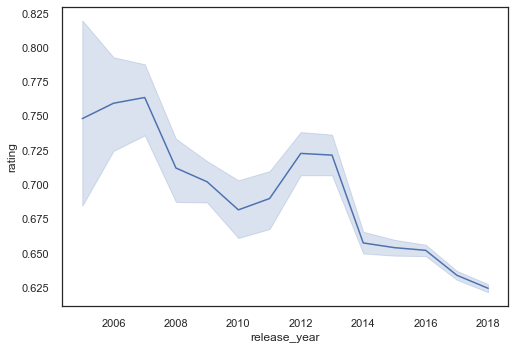

In [27]:
ax = sns.lineplot(x="release_year", y="rating", data=df2005up)

Interestingly, there appears to be a general downward trend in rating over the years. Why is this so?

In [32]:
df2005up['release_year'].value_counts()
# There appears to be a positive trend in game releases as the years go by

2018    8160
2017    6357
2016    4361
2015    2597
2014    1555
2013     418
2012     320
2009     305
2011     239
2010     238
2008     145
2007      93
2006      48
2005       6
Name: release_year, dtype: int64

In [34]:
stats.pearsonr(df2005up['rating'], df2005up['release_year'])

(-0.1506759764805159, 4.509541592674551e-126)

The P-vlaue of this correlation is very low, indicating that there is some significant relationship between rating and release year. The coefficient is negative, which supports what we are seeing in the visualization. There is some negative relationship between the two, but not necessarily that an increased number of releases specifically causes lower ratings.

In [36]:
print(df['achievements'].value_counts())

print(df.achievements[df.achievements == 0].count())
print(df.achievements[df.achievements > 0].count())
# Will separate into dummy column of whether there are achievements or not
# It appears that generally speaking, more games on Steam have achievements

0       11864
10        679
12        618
20        574
15        490
        ...  
184         1
168         1
1487        1
319         1
4094        1
Name: achievements, Length: 410, dtype: int64
11864
15211


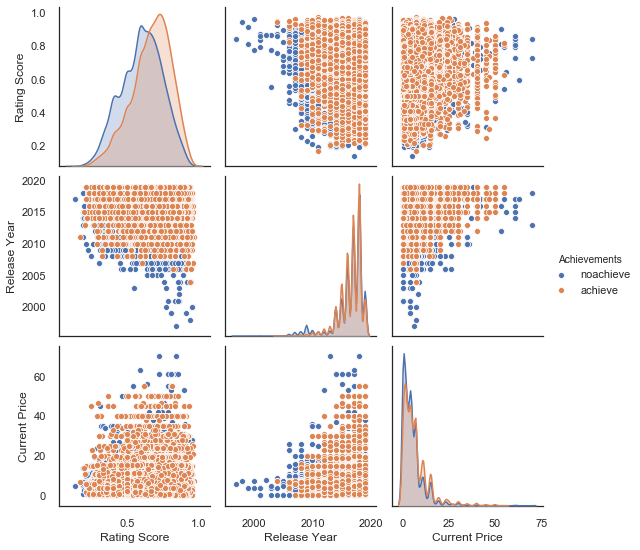

In [37]:
df['containachieve'] = 'noachieve'
df.loc[df['achievements'] > 0, 'containachieve'] = 'achieve'

achievedf = pd.DataFrame(zip(df['rating'],
                          df['release_year'],
                          df['price'],
                          df['containachieve']
                         ),
                      columns=['Rating Score', 'Release Year', 'Current Price', 'Achievements'])

sns.pairplot(achievedf, hue='Achievements')
plt.show()

### Some observations that can be made from this:
- Achievements for games became more commonplace as time goes on
- Games without achievements tend to have a greater range of pricing
- Games with achievements tend to have slightly higher score.
- Pricing for games with or without achievements are more or less the same.
- Pricing for games with or without achievements generally became more expensive as time went on
- Most games are under 20 dollars or so.
- Ratings tend to be a little higher for games with higher price.

In [39]:
print(df['price'].value_counts())

print(df.price[df.price == 0.00].count())
print(df.price[df.price > 0.00].count())

# It appears that only a sparse amount of games on Steam are free to download. Most require purchase.

3.99     3211
0.79     2892
0.00     2560
6.99     2050
7.19     1304
         ... 
15.40       1
7.74        1
19.90       1
6.35        1
6.28        1
Name: price, Length: 271, dtype: int64
2560
24495


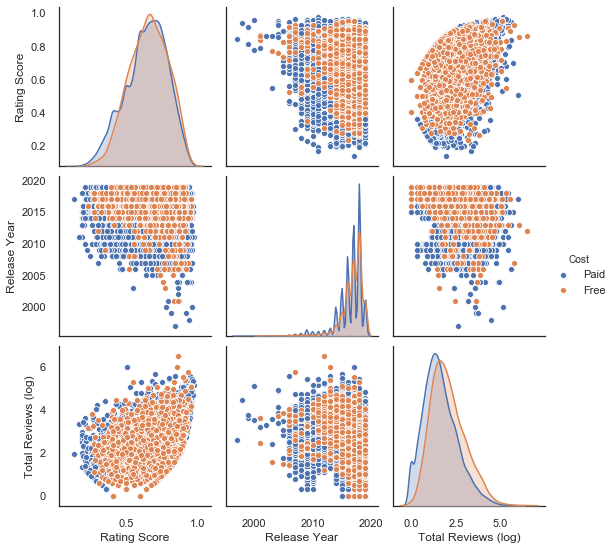

In [40]:
df['Cost'] = 'Free'
df.loc[df['price'] > 0, 'Cost'] = 'Paid'

achievedf = pd.DataFrame(zip(df['rating'],
                          df['release_year'],
                          np.log10(df['totalreview']),
                          df['Cost']
                         ),
                      columns=['Rating Score', 'Release Year', 'Total Reviews (log)', 'Cost'])

sns.pairplot(achievedf, hue='Cost')
plt.show()

### Some observations that can be made from this:
- Free games have about the same rating as paid games.
- Paid games get slightly higher number of reviews
- There seems to be a shift towards free games in the recent years.
- Paid games have a slightly higher range of rating scores.

# Feature Engineering
Mainly generating dummy variables from the given columns from the dataset

In [43]:
def get_unique(series):
    return set(list(itertools.chain(*series.apply(lambda x: [c for c in x.split(';')]))))

#Get unique values from a Pandas series containing semi-colon delimited strings.

In [44]:
platformcols = get_unique(df['platforms'])
platformcols

for col in platformcols:
    df[col] = df['platforms'].apply(lambda x: 1 if col in x.split(';') else 0)

df = df.drop(columns='platforms')
df

KeyError: 'platforms'

In [45]:
platcolval = df[list(platformcols)]
platcolval.head(3)

,mac,linux,windows
0,1,1,1
1,1,1,1
2,1,1,1


In [46]:
genrecols = get_unique(df['genres'])
genrecols

for col in genrecols:
    df[col] = df['genres'].apply(lambda x: 1 if col in x.split(';') else 0)

df = df.drop(columns='genres')
df

,name,developer,publisher,categories,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,totalreview,reviewscore,rating,release_year,days_from_launch,containachieve,Cost,mac,linux,windows,Strategy,Simulation,Game Development,Video Production,Design & Illustration,Utilities,Documentary,Massively Multiplayer,Web Publishing,Violent,Gore,Audio Production,Action,Adventure,Indie,Sexual Content,Tutorial,Software Training,Nudity,Accounting,Animation & Modeling,Photo Editing,Early Access,Racing,Free to Play,Sports,Casual,RPG,Education
0,Counter-Strike,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,0,124534,3339,17612,317,7.19,127873,0.973888,0.960136,2000,6782,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Team Fortress Classic,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,0,3318,633,277,62,3.99,3951,0.839787,0.811703,1999,7362,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Day of Defeat,Valve,Valve,Multi-player;Valve Anti-Cheat enabled,0,3416,398,187,34,3.99,3814,0.895648,0.862598,2003,5871,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Deathmatch Classic,Valve,Valve,Multi-player;Online Multi-Player;Local Multi-P...,0,1273,267,258,184,3.99,1540,0.826623,0.790779,2001,6570,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Half-Life: Opposing Force,Gearbox Software,Valve,Single-player;Multi-player;Valve Anti-Cheat en...,0,5250,288,624,415,3.99,5538,0.947996,0.914546,1999,7148,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,Single-player;Steam Achievements,7,3,0,0,0,2.09,3,1.000000,0.670594,2019,34,achieve,Paid,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27071,Cyber Gun,Semyon Maximov,BekkerDev Studio,Single-player,0,8,1,0,0,1.69,9,0.888889,0.694444,2019,35,noachieve,Paid,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27072,Super Star Blast,EntwicklerX,EntwicklerX,Single-player;Multi-player;Co-op;Shared/Split ...,24,0,1,0,0,3.99,1,0.000000,0.405836,2019,34,achieve,Paid,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27073,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,Single-player;Steam Cloud,0,2,0,0,0,5.19,2,1.000000,0.640795,2019,41,noachieve,Paid,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [47]:
gencolval = df[list(genrecols)]
gencolval

,Strategy,Simulation,Game Development,Video Production,Design & Illustration,Utilities,Documentary,Massively Multiplayer,Web Publishing,Violent,Gore,Audio Production,Action,Adventure,Indie,Sexual Content,Tutorial,Software Training,Nudity,Accounting,Animation & Modeling,Photo Editing,Early Access,Racing,Free to Play,Sports,Casual,RPG,Education
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27071,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27072,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27073,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [48]:
categorycols = get_unique(df['categories'])
categorycols

for col in categorycols:
    df[col] = df['categories'].apply(lambda x: 1 if col in x.split(';') else 0)

df = df.drop(columns='categories')
df

,name,developer,publisher,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,totalreview,reviewscore,rating,release_year,days_from_launch,containachieve,Cost,mac,linux,windows,Strategy,Simulation,Game Development,Video Production,Design & Illustration,Utilities,Documentary,Massively Multiplayer,Web Publishing,Violent,Gore,Audio Production,Action,Adventure,Indie,Sexual Content,Tutorial,Software Training,Nudity,Accounting,Animation & Modeling,Photo Editing,Early Access,Racing,Free to Play,Sports,Casual,RPG,Education,Steam Turn Notifications,Co-op,Mods (require HL2),Local Multi-Player,Includes level editor,VR Support,Commentary available,Partial Controller Support,Steam Achievements,Full controller support,Multi-player,Online Multi-Player,Mods,MMO,Local Co-op,Steam Leaderboards,Online Co-op,Includes Source SDK,Steam Workshop,Captions available,Single-player,Steam Cloud,In-App Purchases,Stats,SteamVR Collectibles,Cross-Platform Multiplayer,Valve Anti-Cheat enabled,Steam Trading Cards,Shared/Split Screen
0,Counter-Strike,Valve,Valve,0,124534,3339,17612,317,7.19,127873,0.973888,0.960136,2000,6782,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,Team Fortress Classic,Valve,Valve,0,3318,633,277,62,3.99,3951,0.839787,0.811703,1999,7362,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Day of Defeat,Valve,Valve,0,3416,398,187,34,3.99,3814,0.895648,0.862598,2003,5871,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Deathmatch Classic,Valve,Valve,0,1273,267,258,184,3.99,1540,0.826623,0.790779,2001,6570,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Half-Life: Opposing Force,Gearbox Software,Valve,0,5250,288,624,415,3.99,5538,0.947996,0.914546,1999,7148,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,7,3,0,0,0,2.09,3,1.000000,0.670594,2019,34,achieve,Paid,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
27071,Cyber Gun,Semyon Maximov,BekkerDev Studio,0,8,1,0,0,1.69,9,0.888889,0.694444,2019,35,noachieve,Paid,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
27072,Super Star Blast,EntwicklerX,EntwicklerX,24,0,1,0,0,3.99,1,0.000000,0.405836,2019,34,achieve,Paid,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
27073,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,0,2,0,0,0,5.19,2,1.000000,0.640795,2019,41,noachieve,Paid,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [49]:
catcolval = df[list(categorycols)]
catcolval

,Steam Turn Notifications,Co-op,Mods (require HL2),Local Multi-Player,Includes level editor,VR Support,Commentary available,Partial Controller Support,Steam Achievements,Full controller support,Multi-player,Online Multi-Player,Mods,MMO,Local Co-op,Steam Leaderboards,Online Co-op,Includes Source SDK,Steam Workshop,Captions available,Single-player,Steam Cloud,In-App Purchases,Stats,SteamVR Collectibles,Cross-Platform Multiplayer,Valve Anti-Cheat enabled,Steam Trading Cards,Shared/Split Screen
0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
27071,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
27072,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
27073,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0


In [51]:
df['platnum'] = df[list(platformcols)].sum(axis=1)
df['genrenum'] = df[list(genrecols)].sum(axis=1)
df['catenum'] = df[list(categorycols)].sum(axis=1)
df
# Generating feature calculating the total number of each dummy variable a game possesses.

,name,developer,publisher,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,totalreview,reviewscore,rating,release_year,days_from_launch,containachieve,Cost,mac,linux,windows,Strategy,Simulation,Game Development,Video Production,Design & Illustration,Utilities,Documentary,Massively Multiplayer,Web Publishing,Violent,Gore,Audio Production,Action,Adventure,Indie,Sexual Content,Tutorial,Software Training,Nudity,Accounting,Animation & Modeling,Photo Editing,Early Access,Racing,Free to Play,Sports,Casual,RPG,Education,Steam Turn Notifications,Co-op,Mods (require HL2),Local Multi-Player,Includes level editor,VR Support,Commentary available,Partial Controller Support,Steam Achievements,Full controller support,Multi-player,Online Multi-Player,Mods,MMO,Local Co-op,Steam Leaderboards,Online Co-op,Includes Source SDK,Steam Workshop,Captions available,Single-player,Steam Cloud,In-App Purchases,Stats,SteamVR Collectibles,Cross-Platform Multiplayer,Valve Anti-Cheat enabled,Steam Trading Cards,Shared/Split Screen,platnum,genrenum,catenum
0,Counter-Strike,Valve,Valve,0,124534,3339,17612,317,7.19,127873,0.973888,0.960136,2000,6782,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,4
1,Team Fortress Classic,Valve,Valve,0,3318,633,277,62,3.99,3951,0.839787,0.811703,1999,7362,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,4
2,Day of Defeat,Valve,Valve,0,3416,398,187,34,3.99,3814,0.895648,0.862598,2003,5871,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,2
3,Deathmatch Classic,Valve,Valve,0,1273,267,258,184,3.99,1540,0.826623,0.790779,2001,6570,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,4
4,Half-Life: Opposing Force,Gearbox Software,Valve,0,5250,288,624,415,3.99,5538,0.947996,0.914546,1999,7148,noachieve,Paid,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,Room of Pandora,SHEN JIAWEI,SHEN JIAWEI,7,3,0,0,0,2.09,3,1.000000,0.670594,2019,34,achieve,Paid,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,2
27071,Cyber Gun,Semyon Maximov,BekkerDev Studio,0,8,1,0,0,1.69,9,0.888889,0.694444,2019,35,noachieve,Paid,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,1
27072,Super Star Blast,EntwicklerX,EntwicklerX,24,0,1,0,0,3.99,1,0.000000,0.405836,2019,34,achieve,Paid,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,3,7
27073,New Yankee 7: Deer Hunters,Yustas Game Studio,Alawar Entertainment,0,2,0,0,0,5.19,2,1.000000,0.640795,2019,41,noachieve,Paid,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,3,2


# More Data Analysis

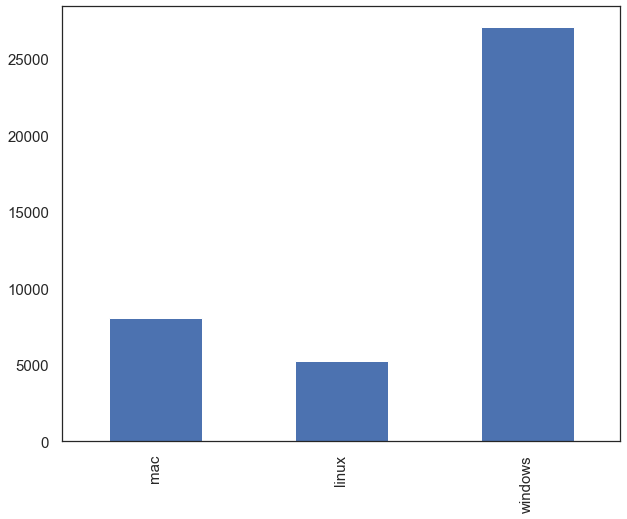

In [58]:
ax = platcolval.sum().plot.bar(figsize=(10,8), fontsize = 15)

It seems a vast majority of games on steam are Windows only.

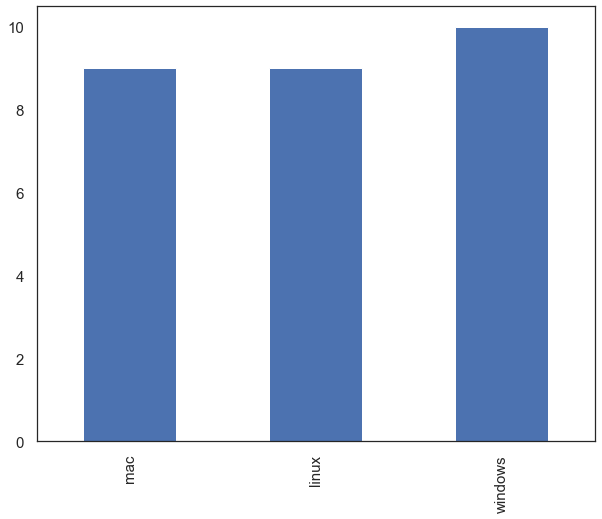

In [59]:
ax = df.sort_values(by='rating', ascending=False)[list(platformcols)].head(10).sum().plot.bar(figsize=(10,8), fontsize = 15) 

However, it appears that the top games are available on all platforms. This makes sense, as more accessibility may lend to more favorable reviews, especially if they are ported well.

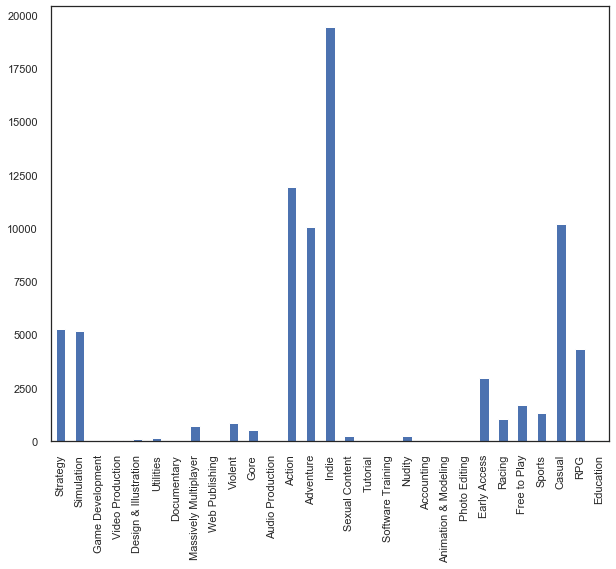

In [54]:
ax = gencolval.sum().plot.bar(figsize=(10,8))

From here, we can see that a mass majority of games on Steam are developed by indie developers. The most common genres are Action, Adventure, for Casual players, RPG, Strategy, Simulation, and Early Access (commonly associated with indie developers).

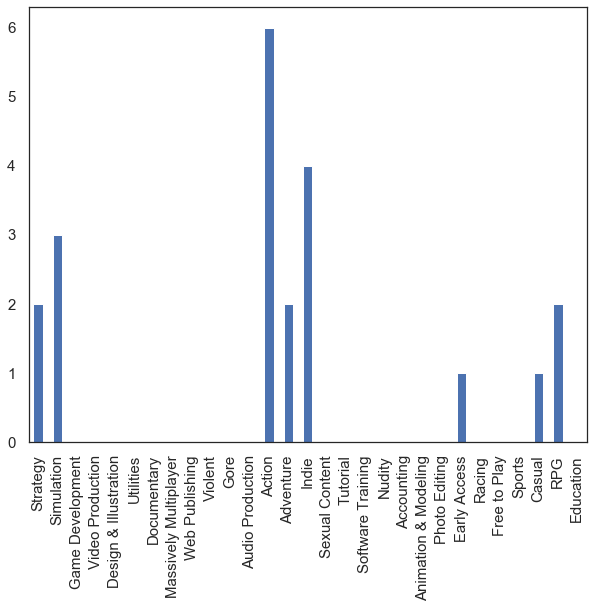

In [55]:
ax = df.sort_values(by='rating', ascending=False)[list(genrecols)].head(10).sum().plot.bar(figsize=(10,8), fontsize = 15)

It seems the same trends follow, which could make sense in the reverse way. It's possible that because these are the most popular types of games, people tend to chase these genres the most, hence why the distribution of genres of most steam games are reflective of the top games.

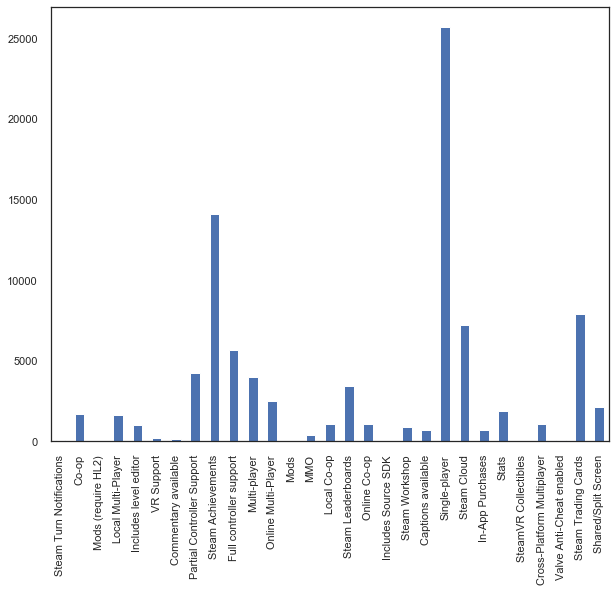

In [56]:
ax = catcolval.sum().plot.bar(figsize=(10,8))

It seems that a vast majority of games are Single-Player, and contain Steam Achievements. Some other common features are Steam Trading cards, Steam Cloud saving, Leaderboards, and Controller Support.

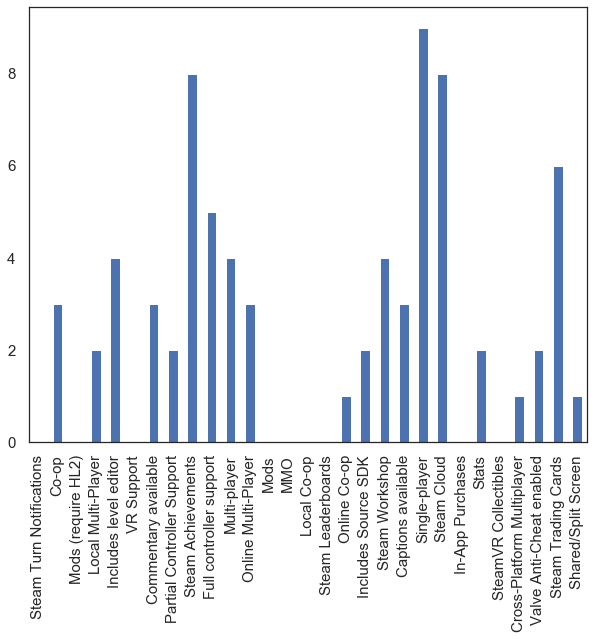

In [57]:
ax = df.sort_values(by='rating', ascending=False)[list(categorycols)].head(10).sum().plot.bar(figsize=(10,8), fontsize = 15)

This one is a little hard to analyze, but it could be possible that the top games in general just contain a lot of features for accessibility. It is notable that MMOs, In-app purchases, and VR-related categories are nonexistent in the top games. MMOs and In-app purchases are usually related, and their decline in popularity in the gaming community is well known. VR is perhaps too expensive for most people and not accessible/convenient.

# Hypothesis Testing

## Test 1:

Null Hypothesis: There is no statisically significant difference in average rating across platforms.

Alternative Hypothesis: There is a statisically significant difference in average rating across platforms.

In [60]:
#print(platcolval['linux'].value_counts())
#print(platcolval['mac'].value_counts())
#print(platcolval['windows'].value_counts())

linux = df.sort_values(by='linux', ascending=False).head(5235)
print(linux['rating'].mean())
mac = df.sort_values(by='mac', ascending=False).head(8066)
print(mac['rating'].mean())
windows = df.sort_values(by='windows', ascending=False).head(27070)
print(windows['rating'].mean())

0.6952754722263711
0.6844579028705016
0.6433503282605261


In [61]:
stats.f_oneway(linux['rating'], mac['rating'], windows['rating'])

F_onewayResult(statistic=466.51266101738497, pvalue=5.035619982069032e-201)

We can reject the Null Hypothesis, and accept the alternative. However, we only know that there is a statistically significant difference between at least 2 platforms, and not which platforms. The F statistic is extremely high and P-value extremely low most likely due to the size of the data.

## Test 2:

Null Hypothesis: There is no statisically significant difference in average rating across Top 10 genres.

Alternative Hypothesis: There is a statisically significant difference in average rating across Top 10 genres.

In [62]:
#print(gencolval['Action'].value_counts())
#print(gencolval['Casual'].value_counts())
#print(gencolval['RPG'].value_counts())
#print(gencolval['Early Access'].value_counts())
#print(gencolval['Indie'].value_counts())
#print(gencolval['Simulation'].value_counts())
#print(gencolval['Strategy'].value_counts())
#print(gencolval['Adventure'].value_counts())

action = df.sort_values(by='Action', ascending=False).head(11903)
print(action['rating'].mean())
casual = df.sort_values(by='Casual', ascending=False).head(10210)
print(casual['rating'].mean())
rpg = df.sort_values(by='RPG', ascending=False).head(4311)
print(rpg['rating'].mean())
earlyacc = df.sort_values(by='Early Access', ascending=False).head(2954)
print(earlyacc['rating'].mean())
indie = df.sort_values(by='Indie', ascending=False).head(7654)
print(indie['rating'].mean())
simulation = df.sort_values(by='Simulation', ascending=False).head(5194)
print(simulation['rating'].mean())
strategy = df.sort_values(by='Strategy', ascending=False).head(5247)
print(strategy['rating'].mean())
adventure = df.sort_values(by='Adventure', ascending=False).head(10032)
print(adventure['rating'].mean())

0.6413595843095746
0.629594291756776
0.6556495792793557
0.6240390648745799
0.6346286555567465
0.6148819361200676
0.6340244396607405
0.6459509381305035


In [63]:
stats.f_oneway(action['rating'], casual['rating'], rpg['rating'], earlyacc['rating'], indie['rating'], simulation['rating'], strategy['rating'], adventure['rating'])

F_onewayResult(statistic=43.89373482527991, pvalue=2.5338004440679598e-62)

We can reject the Null Hypothesis, and accept the alternative. However, we only know that there is a statistically significant difference between at least 2 genres, and not which genres. The F statistic is extremely high and P-value extremely low most likely due to the size of the data.

## Test 3:

Null Hypothesis: There is no statisically significant difference in average rating across Top 10 categories.

Alternative Hypothesis: There is a statisically significant difference in average rating between across Top 10 categories.

In [64]:
#print(catcolval['Stats'].value_counts())
#print(catcolval['Includes Source SDK'].value_counts())
#print(catcolval['Multi-player'].value_counts())
#print(catcolval['Steam Achievements'].value_counts())
#print(catcolval['Shared/Split Screen'].value_counts())
#print(catcolval['Single-player'].value_counts())
#print(catcolval['Co-op'].value_counts())
#print(catcolval['Local Multi-Player'].value_counts())
#print(catcolval['Partial Controller Support'].value_counts())
#print(catcolval['Online Co-op'].value_counts())
#print(catcolval['Full controller support'].value_counts())
#print(catcolval['Captions available'].value_counts())
#print(catcolval['Valve Anti-Cheat enabled'].value_counts())
#print(catcolval['Steam Cloud'].value_counts())
#print(catcolval['Steam Workshop'].value_counts())
#print(catcolval['Cross-Platform Multiplayer'].value_counts())
#print(catcolval['Online Multi-Player'].value_counts())
#print(catcolval['Commentary available'].value_counts())
#print(catcolval['Steam Trading Cards'].value_counts())
#print(catcolval['Includes level editor'].value_counts())

sstats = df.sort_values(by='Stats', ascending=False).head(1878)
print(sstats['rating'].mean())
sdk = df.sort_values(by='Includes Source SDK', ascending=False).head(35)
print(sdk['rating'].mean())
mp = df.sort_values(by='Multi-player', ascending=False).head(3974)
print(mp['rating'].mean())
steamach = df.sort_values(by='Steam Achievements', ascending=False).head(14130)
print(steamach['rating'].mean())
shared = df.sort_values(by='Shared/Split Screen', ascending=False).head(2152)
print(shared['rating'].mean())
sp = df.sort_values(by='Single-player', ascending=False).head(1397)
print(sp['rating'].mean())
coop = df.sort_values(by='Co-op', ascending=False).head(1721)
print(coop['rating'].mean())
localmp = df.sort_values(by='Local Multi-Player', ascending=False).head(1615)
print(localmp['rating'].mean())
pcs = df.sort_values(by='Partial Controller Support', ascending=False).head(4234)
print(pcs['rating'].mean())
oncoop = df.sort_values(by='Online Co-op', ascending=False).head(1071)
print(oncoop['rating'].mean())
fcs = df.sort_values(by='Full controller support', ascending=False).head(5695)
print(fcs['rating'].mean())
caption = df.sort_values(by='Captions available', ascending=False).head(721)
print(caption['rating'].mean())
nocheat = df.sort_values(by='Valve Anti-Cheat enabled', ascending=False).head(94)
print(nocheat['rating'].mean())
cloud = df.sort_values(by='Steam Cloud', ascending=False).head(7219)
print(cloud['rating'].mean())
workshop = df.sort_values(by='Steam Workshop', ascending=False).head(897)
print(workshop['rating'].mean())
crossplat = df.sort_values(by='Cross-Platform Multiplayer', ascending=False).head(1081)
print(crossplat['rating'].mean())
onmp = df.sort_values(by='Online Multi-Player', ascending=False).head(2487)
print(onmp['rating'].mean())
comment = df.sort_values(by='Commentary available', ascending=False).head(144)
print(comment['rating'].mean())
tradecard = df.sort_values(by='Steam Trading Cards', ascending=False).head(7198)
print(tradecard['rating'].mean())
leveledit = df.sort_values(by='Includes level editor', ascending=False).head(1036)
print(leveledit['rating'].mean())

0.6756181728231616
0.7474592452882481
0.6529350906747
0.674196390159534
0.6764254155407398
0.6282228343266751
0.6709950811131584
0.6623000893386507
0.654180724882006
0.660014770898666
0.6936815255586599
0.6916981187627418
0.7730539799750586
0.7061923070641204
0.7265804695039914
0.6651522981606658
0.6454291336203531
0.6871025895074994
0.6874434050479382
0.7027647750320752


In [65]:
stats.f_oneway(sstats['rating'], sdk['rating'], mp['rating'], steamach['rating'], shared['rating'], sp['rating'], coop['rating'], localmp['rating'], pcs['rating'], oncoop['rating'], fcs['rating'], caption['rating'], nocheat['rating'], cloud['rating'], workshop['rating'], crossplat['rating'], onmp['rating'], comment['rating'], tradecard['rating'], leveledit['rating'])

F_onewayResult(statistic=68.94678706900405, pvalue=2.820653197972917e-263)

We can reject the Null Hypothesis, and accept the alternative. However, we only know that there is a statistically significant difference between at least 2 categories, and not which categories. The F statistic is extremely high and P-value extremely low most likely due to the size of the data.

# OLS Modeling

1st Model: Base dataset itself is used, with features that are compatible with OLS modeling.

In [66]:
originaldf = pd.read_csv('steam.csv')
originaldf['totalreview'] = originaldf['positive_ratings'] + originaldf['negative_ratings']
originaldf['reviewscore'] = originaldf['positive_ratings'] / originaldf['totalreview']
originaldf['rating'] = originaldf['reviewscore'] - (originaldf['reviewscore'] - 0.5) * (2 ** (-np.log10(originaldf['totalreview'] + 1)))
originaldf.head(3)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,totalreview,reviewscore,rating
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,127873,0.973888,0.960136
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,3951,0.839787,0.811703
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,3814,0.895648,0.862598


In [67]:
original_model = ols(formula='rating~english+required_age+achievements+average_playtime+median_playtime+price',data=originaldf).fit()
original_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     123.0
Date:                Fri, 31 Jul 2020   Prob (F-statistic):          4.44e-154
Time:                        07:41:37   Log-Likelihood:                 14594.
No. Observations:               27075   AIC:                        -2.917e+04
Df Residuals:                   27068   BIC:                        -2.912e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6421      0.006    102.329      0.000       0.630       0.654
english             -0.0155      0.006     -2.455      0.014      -0.028      -0.003
required_age         0.0021      0.000      5.929      0.000       0.001       0.003
achievements     -7.611e-06   2.43e-06     -3.128      0.002   -1.24e-05   -2.84e-06
average_playtime  9.308e-06   1.17e-06      7.986      0.000    7.02e-06    1.16e-05
median_playtime  -4.632e-06   9.04e-07     -5.125      0.000    -6.4e-06   -2.86e-06
price                0.0025      0.000     22.851      0.000       0.002       0.003
==============================================================================
Omnibus:                      840.066   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              916.875
Skew:                          -0.448   Prob(JB):                    8.00e-200
Kurtosis:                       2.897   Cond. No.                     3.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared for the model is extremely low, but the F-statistic is high and P(F-stat) is very low. So while the intercept only model is worse than this model (null rejected, altern accepted), the features are not very good at explaining the variation of the dependent variable. Also we can see that the correlation coefficients for the features are very very small.

# 2nd OLS model

2nd Model is now used with all cleaned dataset and ALL engineered features added.

In [68]:
finaldf = df.drop(columns=['name','developer','publisher', 'positive_ratings', 'negative_ratings', 'reviewscore', 'containachieve', 'Cost', 'Mods (require HL2)'])
finaldf

,achievements,average_playtime,median_playtime,price,totalreview,rating,release_year,days_from_launch,mac,linux,windows,Strategy,Simulation,Game Development,Video Production,Design & Illustration,Utilities,Documentary,Massively Multiplayer,Web Publishing,Violent,Gore,Audio Production,Action,Adventure,Indie,Sexual Content,Tutorial,Software Training,Nudity,Accounting,Animation & Modeling,Photo Editing,Early Access,Racing,Free to Play,Sports,Casual,RPG,Education,Steam Turn Notifications,Co-op,Local Multi-Player,Includes level editor,VR Support,Commentary available,Partial Controller Support,Steam Achievements,Full controller support,Multi-player,Online Multi-Player,Mods,MMO,Local Co-op,Steam Leaderboards,Online Co-op,Includes Source SDK,Steam Workshop,Captions available,Single-player,Steam Cloud,In-App Purchases,Stats,SteamVR Collectibles,Cross-Platform Multiplayer,Valve Anti-Cheat enabled,Steam Trading Cards,Shared/Split Screen,platnum,genrenum,catenum
0,0,17612,317,7.19,127873,0.960136,2000,6782,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,4
1,0,277,62,3.99,3951,0.811703,1999,7362,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,4
2,0,187,34,3.99,3814,0.862598,2003,5871,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,2
3,0,258,184,3.99,1540,0.790779,2001,6570,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,1,4
4,0,624,415,3.99,5538,0.914546,1999,7148,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,7,0,0,2.09,3,0.670594,2019,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,2
27071,0,0,0,1.69,9,0.694444,2019,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,1
27072,24,0,0,3.99,1,0.405836,2019,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,3,7
27073,0,0,0,5.19,2,0.640795,2019,41,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,2,3,2


In [69]:
finaldf.columns = finaldf.columns.str.strip().str.replace('\s+', '_')
finaldf.columns = finaldf.columns.str.strip().str.replace('-', '')
finaldf.columns = finaldf.columns.str.strip().str.replace('&', 'and')
finaldf.columns = finaldf.columns.str.strip().str.replace('/', 'and')
featurelist = list(finaldf.columns)
featurelist.remove('rating')

In [70]:
game_model = ols(formula='rating~'+'+'.join(featurelist), data=finaldf).fit()
game_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     87.35
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        07:45:30   Log-Likelihood:                 16874.
No. Observations:               27055   AIC:                        -3.361e+04
Df Residuals:                   26987   BIC:                        -3.305e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -3.7832      5.537     -0.683      0.494     -14.636       7.069
achievements               -4.744e-06   2.28e-06     -2.084      0.037   -9.21e-06   -2.82e-07
average_playtime            4.928e-06   1.14e-06      4.330      0.000     2.7e-06    7.16e-06
median_playtime            -2.395e-06   8.69e-07     -2.755      0.006    -4.1e-06   -6.91e-07
price                          0.0029      0.000     20.351      0.000       0.003       0.003
totalreview                 1.501e-07   3.81e-08      3.939      0.000    7.54e-08    2.25e-07
release_year                   0.0021      0.003      0.784      0.433      -0.003       0.008
days_from_launch             2.69e-05   7.62e-06      3.530      0.000     1.2e-05    4.18e-05
mac                            0.0163      0.015      1.110      0.267      -0.012       0.045
linux                          0.0030      0.015      0.203      0.839      -0.026       0.032
windows                       -0.0104      0.044     -0.239      0.811      -0.096       0.075
Strategy                      -0.0070      0.005     -1.299      0.194      -0.018       0.004
Simulation                    -0.0134      0.005     -2.474      0.013      -0.024      -0.003
Game_Development              -0.0043      0.040     -0.106      0.915      -0.083       0.075
Video_Production               0.0088      0.025      0.357      0.721      -0.040       0.057
Design_and_Illustration        0.0162      0.023      0.703      0.482      -0.029       0.061
Utilities                      0.0013      0.015      0.091      0.927      -0.027       0.030
Documentary                   -0.0665      0.071     -0.936      0.349      -0.206       0.073
Massively_Multiplayer         -0.0184      0.009     -2.123      0.034      -0.035      -0.001
Web_Publishing                 0.0615      0.032      1.926      0.054      -0.001       0.124
Violent                       -0.0222      0.008     -2.812      0.005      -0.038      -0.007
Gore                          -0.0012      0.009     -0.139      0.889      -0.019       0.016
Audio_Production              -0.0102      0.026     -0.388      0.698      -0.062       0.041
Action                        -0.0071      0.005     -1.346      0.178      -0.017       0.003
Adventure                      0.0080      0.005      1.514      0.130      -0.002       0.018
Indie                          0.0204      0.005      3.814      0.000       0.010       0.031
Sexual_Content                 0.0350      0.011      3.061      0.002       0.013       0.057
Tutorial                      -0.0665      0.071     -0.936      0.349      -0.206       0.073
Software_Training             -0.0081      0.038     -0.214      0.830      -0.082       0.066
Nudity                         0.0221      

Once again, the model has a high F statistic and P-value indicating that the overall model has some significant relationship between the target variable and feature variables. However, this time there are a lot of p-values for individual features that indicate they are not significant when compared directly to the target variable. These values need to be removed.

In [73]:
finaldfcorr = finaldf.corr() 
finaldfcorr
#Checking for collinearity

,achievements,average_playtime,median_playtime,price,totalreview,rating,release_year,days_from_launch,mac,linux,windows,Strategy,Simulation,Game_Development,Video_Production,Design_and_Illustration,Utilities,Documentary,Massively_Multiplayer,Web_Publishing,Violent,Gore,Audio_Production,Action,Adventure,Indie,Sexual_Content,Tutorial,Software_Training,Nudity,Accounting,Animation_and_Modeling,Photo_Editing,Early_Access,Racing,Free_to_Play,Sports,Casual,RPG,Education,Steam_Turn_Notifications,Coop,Local_MultiPlayer,Includes_level_editor,VR_Support,Commentary_available,Partial_Controller_Support,Steam_Achievements,Full_controller_support,Multiplayer,Online_MultiPlayer,Mods,MMO,Local_Coop,Steam_Leaderboards,Online_Coop,Includes_Source_SDK,Steam_Workshop,Captions_available,Singleplayer,Steam_Cloud,InApp_Purchases,Stats,SteamVR_Collectibles,CrossPlatform_Multiplayer,Valve_AntiCheat_enabled,Steam_Trading_Cards,SharedandSplit_Screen,platnum,genrenum,catenum
achievements,1.000000,0.014175,0.009957,-0.007710,0.005813,-0.019346,0.034243,-0.033090,-0.023553,-0.009535,0.001220,0.038548,0.034984,-0.003132,-0.004558,-0.006906,-0.008898,-0.000763,-0.010043,-0.003923,0.003008,0.008167,-0.003987,0.016220,-0.029684,0.003169,-0.000043,-0.000763,-0.004257,-0.006013,-0.001896,-0.006617,-0.002647,-0.030824,-0.012395,-0.016047,-0.010995,0.076451,0.003984,-0.005419,0.000225,-0.005392,-0.017380,-0.004319,-0.008360,0.006712,-0.025051,0.110645,-0.024427,-0.021968,-0.019289,0.003199,-0.006010,-0.012118,0.005792,-0.004764,-0.000401,0.000406,-0.007753,0.017678,-0.003548,-0.005017,0.014561,-0.002811,-0.002229,0.003831,-0.012211,-0.015204,-0.018882,0.031121,0.003737
average_playtime,0.014175,1.000000,0.914900,0.059982,0.164463,0.056921,-0.052997,0.053083,0.027909,0.031488,0.001114,0.011627,0.001183,-0.000464,-0.002520,-0.001168,-0.001501,-0.000498,0.052192,-0.000239,-0.009975,-0.007954,-0.002645,-0.002806,0.000778,-0.032232,-0.003421,-0.000498,-0.002596,-0.002717,-0.001221,-0.001826,0.003225,-0.013122,-0.000823,0.057397,-0.004252,-0.027567,0.030293,-0.002541,-0.001631,0.044763,-0.003823,0.022921,0.008045,0.011388,0.008829,0.008887,-0.001153,0.050282,0.025424,0.001800,0.060464,-0.006631,0.003494,0.027121,0.014696,0.048749,0.022218,-0.039834,0.015234,0.037693,0.012355,0.010677,0.043157,0.062833,0.044287,-0.005674,0.032787,0.000284,0.050046
median_playtime,0.009957,0.914900,1.000000,0.044591,0.039437,0.038002,-0.034508,0.034467,0.019626,0.021210,0.000843,0.012702,-0.000974,-0.000320,-0.001859,-0.001078,0.000037,-0.000377,0.025372,-0.000105,-0.007377,-0.005856,-0.002001,-0.010399,0.003395,-0.016234,-0.002287,-0.000377,-0.001875,-0.002162,-0.000924,-0.001599,0.002540,-0.009670,-0.001126,0.042509,-0.004083,-0.016380,0.026861,-0.001836,-0.000641,0.023927,-0.004757,0.010535,0.001156,0.005816,0.001751,0.003200,-0.002131,0.032173,0.012353,-0.000017,0.031326,-0.006000,0.003254,0.013669,0.003598,0.026208,0.021788,-0.027536,0.013896,0.013538,0.005549,-0.000940,0.038327,0.013024,0.029518,-0.003633,0.022579,0.002304,0.028004
price,-0.007710,0.059982,0.044591,1.000000,0.049460,0.179555,-0.071628,0.070422,0.022789,0.024462,0.003333,0.068386,0.078490,0.031390,0.008282,0.072520,0.030581,-0.001857,-0.047245,0.060415,0.002060,-0.006143,0.010554,0.016324,0.011007,-0.233476,0.012724,-0.001857,0.037704,0.019961,-0.006987,0.048447,0.027929,0.054243,0.030425,-0.233105,0.065929,-0.224499,0.064311,0.040704,0.012228,0.105717,0.065212,0.065032,0.036754,-0.006777,0.035759,0.118190,0.156264,0.144633,0.096262,-0.007861,-0.040591,0.055896,0.041939,0.087875,-0.012597,0.125710,0.022622,0.036382,0.223959,-0.069232,0.015357,0.060011,0.011928,0.055530,0.142864,0.070633,0.026171,-0.096591,0.235474
totalreview,0.005813,0.164463,0.039437,0.049460,1.000000,0.062645,-0.061168,0.060631,0.028702,0.037287,0.000691,-0.003659,-0.004896,-0.001198,-0.001004,-0.000706,-0.001815,-0.000328,0.030579,-0.001179,-0.006358,-0.004848,-0.001677,0.028715,-0.003722,-0.041195,-0.002117,-0.000328,-0.001625,-0.000788,-0.000797

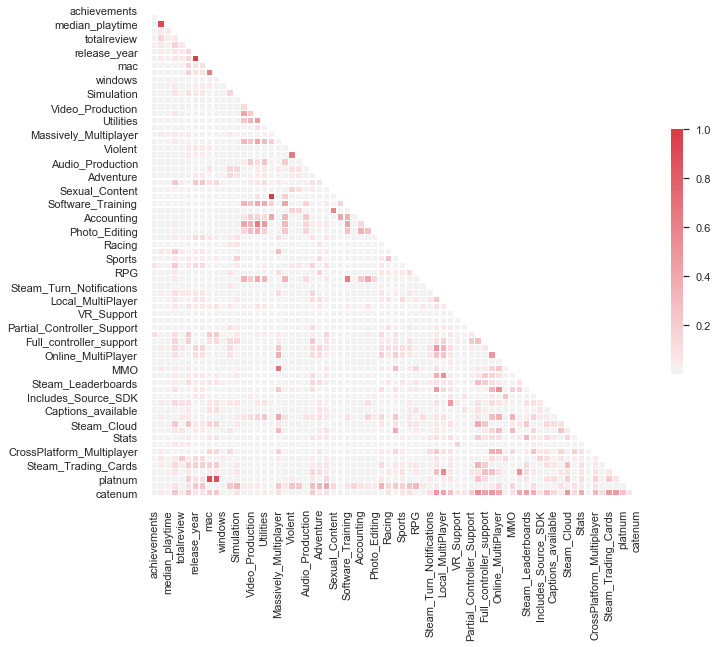

In [72]:
#using a heat map to display the visuals for the correlations in the dataset
sns.set(style="white")  
# Compute the correlation matrix
corr = np.abs(finaldf.corr())
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})

# 3rd OLS Model

Features that had P>|t| values greater than 0.05 are removed, as they are considered to have no significant correlation with the target variable.

In [74]:
featurelist = [e for e in featurelist if e not in ('Adventure', 'MMO', 'RPG', 'Tutorial', 'Web_Publishing', 'Software_Training', 'Accounting', 'Game_Development', 'Utilities', 'Video_Production', 'Photo_Editing', 'Education', 'Gore', 'Documentary', 'Design_and_Illustration', 'Nudity', 'Animation_and_Modeling', 'Audio_Production', 'VR_Support', 'Includes_Source_SDK', 'SharedandSplit_Screen', 'Steam_Turn_Notifications', 'Coop', 'Local_MultiPlayer', 'Online_Coop', 'Mods', 'Captions_available', 'Valve_AntiCheat_enabled', 'CrossPlatform_Multiplayer', 'Commentary_available', 'release_year', 'platnum','genrenum','catenum','windows')]

In [75]:
finalgame_model = ols(formula='rating~'+'+'.join(featurelist), data=finaldf).fit()
finalgame_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     166.3
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        07:57:14   Log-Likelihood:                 16858.
No. Observations:               27055   AIC:                        -3.364e+04
Df Residuals:                   27019   BIC:                        -3.335e+04
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      0.5543      0.005    116.397      0.000       0.545       0.564
achievements               -4.637e-06   2.27e-06     -2.038      0.042    -9.1e-06   -1.78e-07
average_playtime            5.001e-06   1.13e-06      4.406      0.000    2.78e-06    7.23e-06
median_playtime            -2.456e-06   8.67e-07     -2.832      0.005   -4.16e-06   -7.56e-07
price                          0.0029      0.000     20.659      0.000       0.003       0.003
totalreview                  1.65e-07   3.75e-08      4.396      0.000    9.14e-08    2.39e-07
days_from_launch            2.127e-05   1.15e-06     18.545      0.000     1.9e-05    2.35e-05
mac                            0.0249      0.002     11.063      0.000       0.020       0.029
linux                          0.0119      0.003      4.553      0.000       0.007       0.017
Strategy                      -0.0165      0.002     -7.798      0.000      -0.021      -0.012
Simulation                    -0.0232      0.002    -10.892      0.000      -0.027      -0.019
Massively_Multiplayer         -0.0365      0.006     -6.370      0.000      -0.048      -0.025
Violent                       -0.0371      0.005     -7.969      0.000      -0.046      -0.028
Action                        -0.0168      0.002     -9.450      0.000      -0.020      -0.013
Indie                          0.0106      0.002      5.352      0.000       0.007       0.014
Sexual_Content                 0.0327      0.008      3.855      0.000       0.016       0.049
Early_Access                   0.0062      0.003      2.303      0.021       0.001       0.012
Racing                        -0.0278      0.004     -6.365      0.000      -0.036      -0.019
Free_to_Play                   0.0690      0.004     18.376      0.000       0.062       0.076
Sports                        -0.0161      0.004     -4.118      0.000      -0.024      -0.008
Casual                        -0.0054      0.002     -3.125      0.002      -0.009      -0.002
Includes_level_editor          0.0147      0.005      3.104      0.002       0.005       0.024
Partial_Controller_Support     0.0117      0.002      4.995      0.000       0.007       0.016
Steam_Achievements             0.0251      0.002     12.968      0.000       0.021       0.029
Full_controller_support        0.0282      0.002     12.180      0.000       0.024       0.033
Multiplayer                   -0.0114      0.003     -4.078      0.000      -0.017      -0.006
Online_MultiPlayer             0.0197      0.004      5.580      0.000       0.013       0.027
Local_Coop                     0.0128      0.004      2.997      0.003       0.004       0.021
Steam_Leaderboards             0.0160      0.003      6.019      0.000       0.011       0.021
Steam_Workshop                 0.0309      

This is the best model that we have so far, with a high F statistic and P value less than 0.05. So we are 95% confident that the data we have is significant to the model. However the R squared value is still somewhat low, as the model is only able to explain 17.7% of the variance in the dependent variable that is predictable from the independent variables. 

In [78]:
finaldffeature = finaldf[featurelist]
finaldffeature

,achievements,average_playtime,median_playtime,price,totalreview,days_from_launch,mac,linux,Strategy,Simulation,Massively_Multiplayer,Violent,Action,Indie,Sexual_Content,Early_Access,Racing,Free_to_Play,Sports,Casual,Includes_level_editor,Partial_Controller_Support,Steam_Achievements,Full_controller_support,Multiplayer,Online_MultiPlayer,Local_Coop,Steam_Leaderboards,Steam_Workshop,Singleplayer,Steam_Cloud,InApp_Purchases,Stats,SteamVR_Collectibles,Steam_Trading_Cards
0,0,17612,317,7.19,127873,6782,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,0,277,62,3.99,3951,7362,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0,187,34,3.99,3814,5871,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,258,184,3.99,1540,6570,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,0,624,415,3.99,5538,7148,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,7,0,0,2.09,3,34,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
27071,0,0,0,1.69,9,35,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
27072,24,0,0,3.99,1,34,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,1,0,0,0,0
27073,0,0,0,5.19,2,41,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [77]:
corr = finaldffeature.corr()
corr.style.background_gradient(cmap="coolwarm").set_precision(2)

Some of the correlations here are relatively obvious, such as how there is a negative correlation between single-player and MMOs, or free-to-play and in-app purchases.

# Train Test Split

In [79]:
finaldffeature['price'] = finaldffeature['price'].fillna(0).astype(int)
#Apparently, some null values appeared.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
from sklearn.model_selection import train_test_split
target = finaldf['rating']
X_train, X_test, y_train, y_test = train_test_split(finaldffeature, target, random_state=22, test_size=0.2)

In [81]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ", y_test.shape)

Training set - Features:  (21660, 35) Target:  (21660,)
Training set - Features:  (5415, 35) Target:  (5415,)


In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scale = pd.DataFrame(data=scaler.transform(X_train), columns=finaldffeature.columns)

X_test_scale = pd.DataFrame(data=scaler.transform(X_test), columns=finaldffeature.columns)

In [83]:
# fit a model
from sklearn import linear_model
from sklearn import metrics

#instantiate a linear regression object
lm = linear_model.LinearRegression()

#fit the linear regression to the data
lm = lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))


print('Training Root Mean Squared Error:' , train_rmse)
print("R^2 Score:", metrics.r2_score(y_train, (y_train_pred)))

Training Root Mean Squared Error: 0.12976645510617033
R^2 Score: 0.17650272788150645


In [84]:
#use fitted model to predict on the test examples
y_pred = lm.predict(X_test)

#evaluate the predictions on the test examples
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Testing Root Mean Squared Error:' , test_rmse)
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred))
print('Training: ', int(train_rmse), "vs. Testing: ", int(test_rmse))

Testing Root Mean Squared Error: 0.1295355089357786
R^2 Test Score: 0.18278373212843413
Training:  0 vs. Testing:  0


In [85]:
#calculate # of standard deviations the average error is away from the true value
sde = test_rmse / y_test.std()
sde

0.9039166724537819

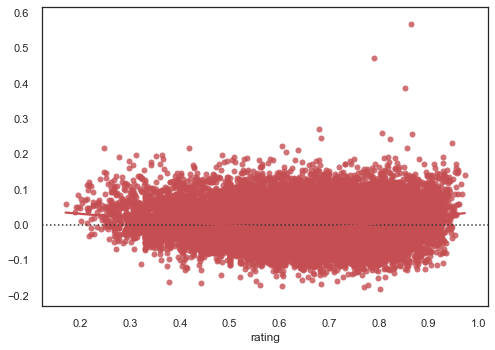

In [86]:
sns.residplot(y_train, y_train_pred,lowess=True, color="r")

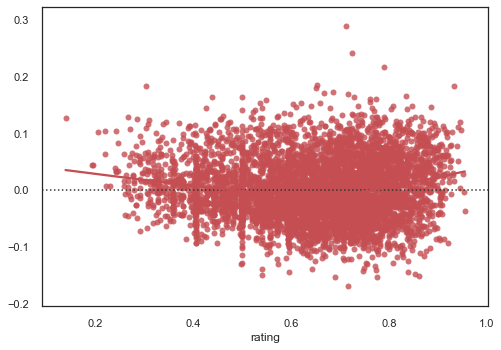

In [87]:
sns.residplot(y_test, y_pred,lowess=True, color="r")

# Lasso Model

In [88]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 2, normalize = False, max_iter = 10000, tol = 4.44)
lasso = lasso.fit(X_train, y_train)
y_train_pred2 = lasso.predict(X_train)
y_pred2 = lasso.predict(X_test)

train_rmse2 = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred2))
test_rmse2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred2))

print('Training Root Mean Squared Error:' , train_rmse2)
print("Testing Rooot Mean Squared Error:" , test_rmse2)

print ("R^2 Train Score:", metrics.r2_score(y_train, (y_train_pred2)))
print("R^2 Test Score:", metrics.r2_score(y_test, y_pred2))

Training Root Mean Squared Error: 0.1412243637880046
Testing Rooot Mean Squared Error: 0.1413967586028036
R^2 Train Score: 0.02465887432108016
R^2 Test Score: 0.026270697868202575


In [89]:
lsde = test_rmse2 / y_test.std()
lsde

0.9866861108745345

# Polynomial Model

In [90]:
# Have to drop dummy variables for poly regression model
finalpoly = finaldffeature.drop(columns=['mac', 'linux', 'Indie', 'Simulation', 'Free_to_Play', 'Violent', 'Massively_Multiplayer', 'Strategy', 'Sports', 'Racing', 'Sexual_Content', 'Early_Access', 'Casual', 'Action', 'Full_controller_support', 'Includes_level_editor', 'Steam_Cloud', 'InApp_Purchases', 'Online_MultiPlayer', 'Steam_Leaderboards', 'Stats', 'SteamVR_Collectibles', 'Singleplayer', 'Steam_Achievements', 'Local_Coop', 'Partial_Controller_Support', 'Steam_Workshop', 'Multiplayer', 'Steam_Trading_Cards'])
finalpoly

,achievements,average_playtime,median_playtime,price,totalreview,days_from_launch
0,0,17612,317,7,127873,6782
1,0,277,62,3,3951,7362
2,0,187,34,3,3814,5871
3,0,258,184,3,1540,6570
4,0,624,415,3,5538,7148
...,...,...,...,...,...,...
27070,7,0,0,2,3,34
27071,0,0,0,1,9,35
27072,24,0,0,3,1,34
27073,0,0,0,5,2,41


In [91]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree = 2)
x_poly = polynomial_features.fit_transform(finalpoly)

polynomial_features = PolynomialFeatures(degree = 2)
x_poly = polynomial_features.fit(finalpoly)
x_poly_df = pd.DataFrame(x_poly.transform(finalpoly),columns = x_poly.get_feature_names(finalpoly.columns))

X_train2, X_test2, y_train2, y_test2 = train_test_split(x_poly_df, target, train_size = 0.8, test_size = 0.2, random_state = 22)

In [94]:
from sklearn.linear_model import LinearRegression

lm_poly = LinearRegression()

lm_poly = lm.fit(X_train2, (y_train2))


y_train_p = lm_poly.predict(X_train2)
y_test_p = lm_poly.predict(X_test2)

train_mae3 = metrics.mean_absolute_error(y_train2, (y_train_p))  #getting the mean absolute error
train_mse3 = metrics.mean_squared_error(y_train2, (y_train_p))   #getting the mean squared error
train_rmse3 = np.sqrt(metrics.mean_squared_error(y_train2, (y_train_p)))  #getting the root mean squared error

# print(train_mae)
# print(train_mse)

print ("R^2 Score:", lm_poly.score(X_train2, (y_train2)))
print ("R^2 Score:", lm_poly.score(X_test2, (y_test2)))

test_mae3 = metrics.mean_absolute_error(y_test2, y_test_p)
test_mse3 = (metrics.mean_squared_error(y_test2, y_test_p))
test_rmse3 = np.sqrt(metrics.mean_squared_error(y_test2, y_test_p))

# print(test_mae)
# print(test_mse)
print(train_rmse3)
print(test_rmse3)

R^2 Score: 0.08009950074068706
R^2 Score: 0.08059485915807874
0.13715188655553845
0.13739590783348024


In [95]:
psde = test_rmse3 / y_test2.std()
psde

0.9587676216193305

# Lasso Model with Polynomial

In [96]:
from sklearn.linear_model import Lasso
X_train3, X_test3, y_train3, y_test3 = train_test_split(x_poly_df, target, random_state=25,test_size=0.2)

In [97]:
lasso = Lasso(alpha = 2, normalize = False, max_iter = 10000, tol = 4.44)
lasso = lasso.fit(X_train3, y_train3)
y_train_pred3 = lasso.predict(X_train3)
y_pred3 = lasso.predict(X_test3)

train_rmse4 = np.sqrt(metrics.mean_squared_error(y_train3, y_train_pred3))
test_rmse4 = np.sqrt(metrics.mean_squared_error(y_test3, y_pred3))

print('Training Root Mean Squared Error:' , train_rmse4)
print("Testing Rooot Mean Squared Error:" , test_rmse4)
# print ("R^2 Score:", lasso.score(y_train, y_train_pred))
print ("R^2 Train Score:", metrics.r2_score(y_train3, (y_train_pred3)))
print("R^2 Test Score:", metrics.r2_score(y_test3, y_pred3))

Training Root Mean Squared Error: 0.1400196317842816
Testing Rooot Mean Squared Error: 0.1391600099199443
R^2 Train Score: 0.04389558205432742
R^2 Test Score: 0.04616746875197231


In [98]:
lpsde = test_rmse4 / y_test3.std()
lpsde

0.9765533190202841

# Results
I will now compare the RMSE and R^2 of every single model

In [99]:
print('Original Training Error: ', train_rmse, 'Original Testing Error: ', test_rmse)
print('Original R^2 Score: ', metrics.r2_score(y_train, (y_train_pred)), 'Original R^2 Test Score:', metrics.r2_score(y_test, y_pred))

Original Training Error:  0.13715188655553845 Original Testing Error:  0.13739590783348024
Original R^2 Score:  0.17650272788150645 Original R^2 Test Score: 0.18278373212843413


In [100]:
print('Lasso Training Error: ', train_rmse2, 'Lasso Testing Error: ', test_rmse2)
print('Lasso R^2 Score: ', metrics.r2_score(y_train, (y_train_pred2)), 'Lasso R^2 Test Score:', metrics.r2_score(y_test, y_pred2))

Lasso Training Error:  0.1412243637880046 Lasso Testing Error:  0.1413967586028036
Lasso R^2 Score:  0.02465887432108016 Lasso R^2 Test Score: 0.026270697868202575


In [101]:
print('Poly Training Error: ', train_rmse3, 'Poly Testing Error: ', test_rmse3)
print('Poly R^2 Score: ', lm_poly.score(X_train2, (y_train2)), 'Poly R^2 Test Score:', lm_poly.score(X_test2, (y_test2)))

Poly Training Error:  0.13715188655553845 Poly Testing Error:  0.13739590783348024
Poly R^2 Score:  0.08009950074068706 Poly R^2 Test Score: 0.08059485915807874


In [102]:
print('Lasso + Poly Training Error: ', train_rmse4, 'Lasso + PolyTesting Error: ', test_rmse4)
print('Lasso + Poly R^2 Score: ', metrics.r2_score(y_train3, (y_train_pred3)), 'Lasso + Poly R^2 Test Score:', metrics.r2_score(y_test3, y_pred3))

Lasso + Poly Training Error:  0.1400196317842816 Lasso + PolyTesting Error:  0.1391600099199443
Lasso + Poly R^2 Score:  0.04389558205432742 Lasso + Poly R^2 Test Score: 0.04616746875197231


It appears that while RMSE for all the models are relatively good, the best model is the original.

It is also notable that R^2 has decreased for all models except for the original.

In [103]:
print('Root Mean Squared Error Z-score:' , test_rmse/target.std())

Root Mean Squared Error Z-score: 0.9604063597932176


For the original test, it appears that the RMSE is almost 1 whole standard deviation from the true value.

# Conclusion

- The original model was most successful at predicting "rating" of Steam Games.
- Based on the RMSE, the model is relatively accurate at predicting "rating" due to being close to zero.
- However, the R^2 Value was relatively low. My P values for my features were also very low, usually being 0. This may be due to the fact that the data is very noisy and is highly variable, but still has a significant trend. This can be seen in the residual plots for the original model.

# Recommendations

- Build games capable of running on multiple operating systems.
- It is more favorable to make paid games than free-to-play. In-app Purchases are disliked.
- Be an indie developer making casual single-player games, preferably with the Action, Adventure, Simulation, and/or Strategy genre tag(s)
- Games with as much compatability with Steam tend to do better than stand-alone games, so for example encourage steam workshop modding, achievement hunting, collectibles/trading cards.
- Release games when no other notable titles are coming out at the same time.

# Future Work

- Work with data from other video game distribution services like the Epic Store, GOG.com, GamersGate.
- Take a look into console or mobile game markets.
- Focus entirely on Indie game developers as opposed to including big game companies.
- Scrape for more data on Steam Store that may not have been covered here.